<a href="https://colab.research.google.com/github/CKrishnaGhrini/Project--Diabetes-Prediction/blob/main/Project_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [4]:
diabetes=pd.read_csv('/content/diabetes.csv')


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes.shape

(768, 9)

In [48]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [10]:
diabetes.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
diabetes.groupby(['Outcome']).max()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,13,197,122,60,744,57.3,2.329,81
1,17,199,114,99,846,67.1,2.420,70


In [47]:
diabetes.groupby(['Outcome']).min()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,0,0,0,0,0,0.0,0.078,21
1,0,0,0,0,0,0.0,0.088,21


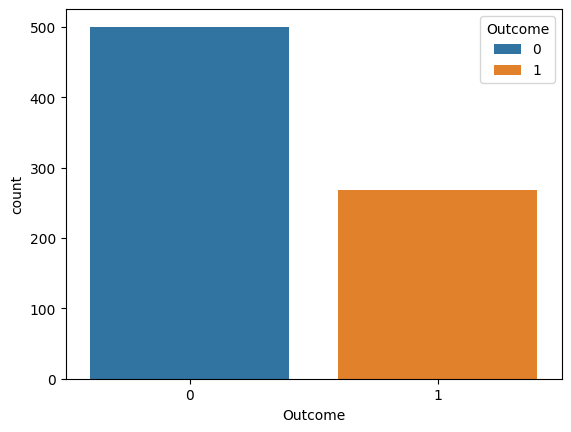

In [13]:
sns.countplot(data=diabetes,x='Outcome',hue='Outcome')
plt.show()

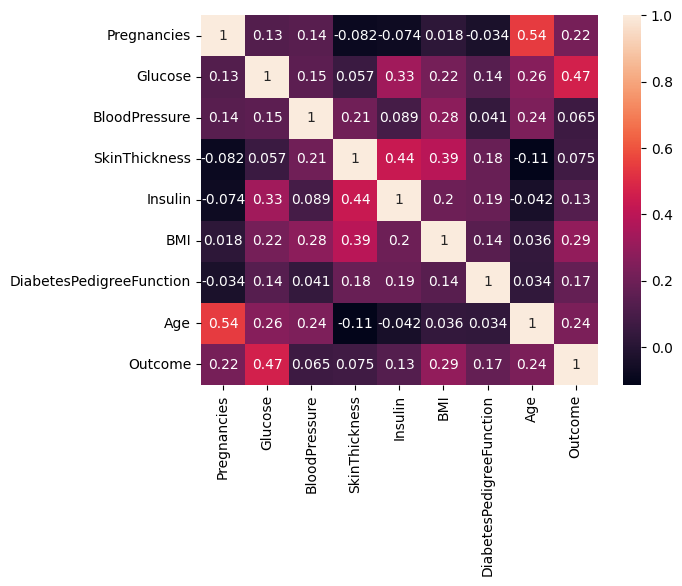

In [14]:
sns.heatmap(diabetes.corr(),annot=True)
plt.show()

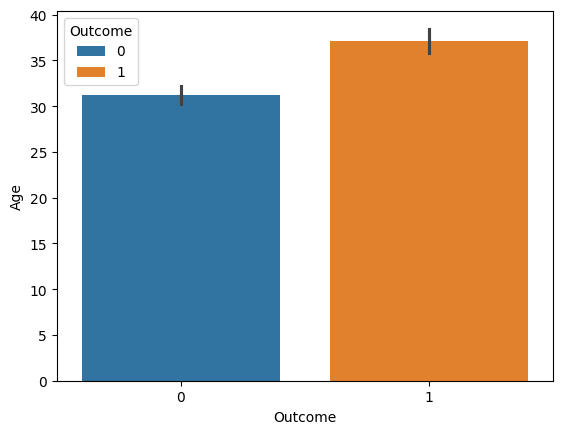

In [15]:
sns.barplot(data=diabetes,x='Outcome',y='Age',hue='Outcome')
plt.show()

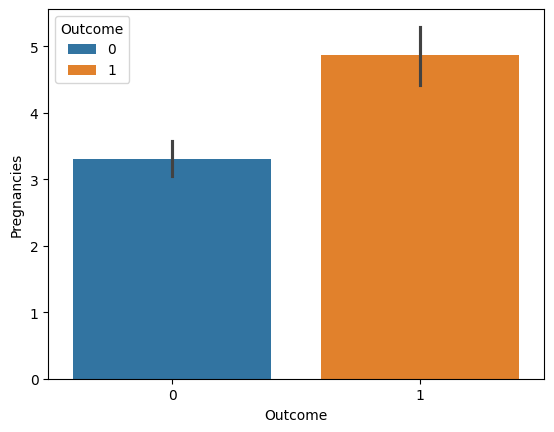

In [16]:
sns.barplot(data=diabetes,x='Outcome',y='Pregnancies',hue='Outcome')
plt.show()

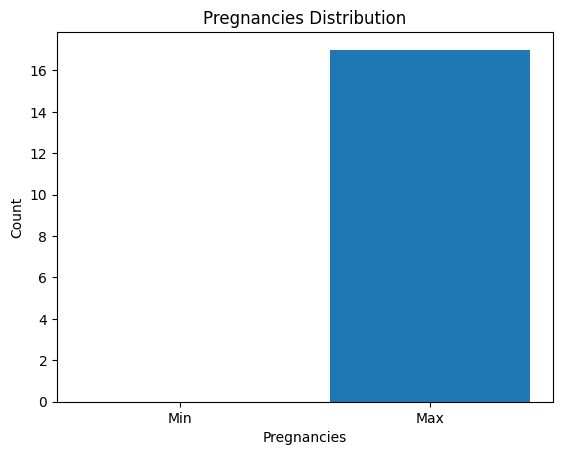

In [45]:
xbar = ['Min', 'Max']
ybar = [diabetes['Pregnancies'].min(), diabetes['Pregnancies'].max()]
plt.bar(xbar, ybar)
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Pregnancies Distribution')
plt.show()


In [18]:
df=diabetes.groupby(['Outcome']).mean().reset_index()
df

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


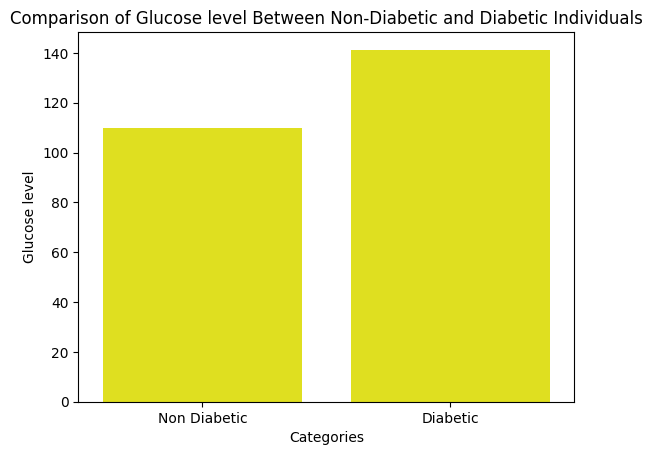

In [19]:
sns.barplot(data=df,x=['Non Diabetic','Diabetic'],y=[df['Glucose'][0],df['Glucose'][1]],color='yellow')
plt.xlabel("Categories")
plt.ylabel("Glucose level")
plt.title("Comparison of Glucose level Between Non-Diabetic and Diabetic Individuals")
plt.show()

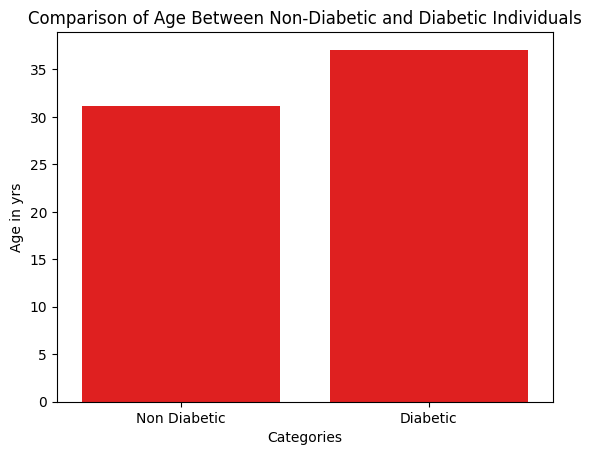

In [20]:
sns.barplot(data=df,x=['Non Diabetic','Diabetic'],y=[df['Age'][0],df['Age'][1]],color='red')
plt.xlabel("Categories")
plt.ylabel("Age in yrs")
plt.title("Comparison of Age Between Non-Diabetic and Diabetic Individuals")
plt.show()

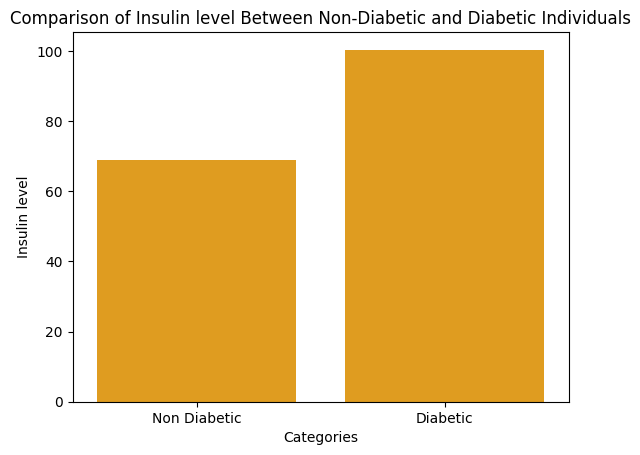

In [21]:
sns.barplot(data=df,x=['Non Diabetic','Diabetic'],y=[df['Insulin'][0],df['Insulin'][1]],color='orange')
plt.xlabel("Categories")
plt.ylabel("Insulin level")
plt.title("Comparison of Insulin level Between Non-Diabetic and Diabetic Individuals")
plt.show()

In [22]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
X=diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=diabetes['Outcome']


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
print(f"the length of training dataset is {len(X_train)}")
print(f"the length of testing dataset is {len(X_test)}")

the length of training dataset is 614
the length of testing dataset is 154


In [26]:
svm_model=SVC(kernel='linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
y_pred=svm_model.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))

[[80 19]
 [19 36]]


In [29]:
X_train_prediction=svm_model.predict(X_train)
print(f"the training accuracy is {accuracy_score(y_train,X_train_prediction)}")

the training accuracy is 0.7736156351791531


In [30]:
print(f"the testing accuracy is {accuracy_score(y_test,y_pred)}")

the testing accuracy is 0.7532467532467533


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [32]:
accuracy_svm=((accuracy_score(y_test,y_pred)))
accuracy_svm

0.7532467532467533

Logistic Regression

In [33]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_log_pred=log_model.predict(X_test)

In [35]:
print(confusion_matrix(y_test,y_log_pred))

[[78 21]
 [18 37]]


In [36]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [37]:
accuracy_logistic=((accuracy_score(y_test,y_log_pred)))
accuracy_logistic

0.7467532467532467

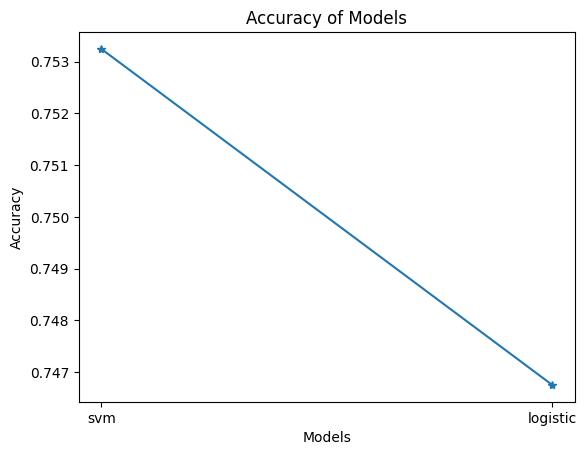

In [44]:
x=np.array(['svm','logistic'])
y=np.array([accuracy_svm,accuracy_logistic])
plt.plot(x,y,marker='*')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

In this project I have used Support Vector Machine and Logistic Regression to predict the likelihood of diabetes. SVM can classify a patient as diabetic or non diabetic based on the input feature such as age,bmi,insulin,blood pressure. On the other hand Logistical Regression finds out of the probability of the outcome and then classifies the patient accordingly. The accuracy of model when trained with svm algorithm and logistic regression is 0.753 and 0.746 respectively. Since the accuracy of model when trained with svm is more than logistic regression I have used svm
